# GUC Clustering Project 

**Objective:** 
The objective of this project teach students how to apply clustering to real data sets

The projects aims to teach student: 
* Which clustering approach to use
* Compare between Kmeans, Hierarchal, DBScan, and Gaussian Mixtures  
* How to tune the parameters of each data approach
* What is the effect of different distance functions (optional) 
* How to evaluate clustering approachs 
* How to display the output
* What is the effect of normalizing the data 

Students in this project will use ready-made functions from Sklearn, plotnine, numpy and pandas 
 



In [74]:
# if plotnine is not installed in Jupter then use the following command to install it 


Running this project require the following imports 

In [75]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs
from plotnine import *   
# StandardScaler is a function to normalize the data 
# You may also check MinMaxScaler and MaxAbsScaler 
#from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from matplotlib.patches import Ellipse
import scipy.stats as stats
from sklearn.metrics import silhouette_score

%matplotlib inline

In [76]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,num_clusters):
    color = 'brgcmykwd'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        k = 'k'+ str(num_clusters)
        for i in range(num_clusters):
#            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
#            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)
            df = X[X[k]==i]
            plt.scatter(df['x'],df['y'],c = color[i], alpha = alpha,s=s)
            plt.title(k)


## Multi Blob Data Set 
* The Data Set generated below has 6 cluster with varying number of users and varing densities
* Cluster the data set below using 



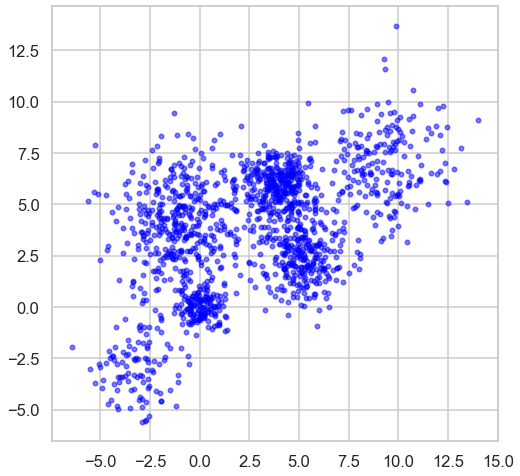

In [77]:
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")

n_bins = 6  
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)
display_cluster(Multi_blob_Data,0)

## change format of the data set to be a data frame

In [78]:
Multi_blob_Data_df1=pd.DataFrame(Multi_blob_Data, columns=list('xy'))
Multi_blob_Data_df1

,x,y
0,-2.354272,-3.179744
1,-2.158005,-1.020061
2,-3.304399,-3.304378
3,-0.947023,-2.002335
4,-3.610317,-2.294672
...,...,...
1445,9.240137,3.378037
1446,10.305952,7.366174
1447,9.864057,13.674604
1448,5.457008,9.931984


### Kmeans 
* Use Kmeans with different values of K to cluster the above data 
* Display the outcome of each value of K 
* Plot distortion function versus K and choose the approriate value of k 
* Plot the silhouette_score versus K and use it to choose the best K 
* Store the silhouette_score for the best K for later comparison with other clustering techniques. 

In [79]:
# k = 4 , 5 ,6 ,7 ,8
Multi_blob_Data_df=Multi_blob_Data_df1.copy()
k4 = KMeans(4).fit_predict(Multi_blob_Data_df[['x','y']])
Multi_blob_Data_df['k4']=k4
k5=KMeans(5).fit_predict(Multi_blob_Data_df[['x','y']])
Multi_blob_Data_df['k5']=k5
k6=KMeans(6).fit_predict(Multi_blob_Data_df[['x','y']])
Multi_blob_Data_df['k6']=k6
k7=KMeans(7).fit_predict(Multi_blob_Data_df[['x','y']])
Multi_blob_Data_df['k7']=k7
k8=KMeans(8).fit_predict(Multi_blob_Data_df[['x','y']])
Multi_blob_Data_df['k8']=k8
Multi_blob_Data_df

,x,y,k4,k5,k6,k7,k8
0,-2.354272,-3.179744,0,1,0,6,5
1,-2.158005,-1.020061,0,1,0,6,5
2,-3.304399,-3.304378,0,1,0,6,5
3,-0.947023,-2.002335,0,1,0,6,5
4,-3.610317,-2.294672,0,1,0,6,5
...,...,...,...,...,...,...,...
1445,9.240137,3.378037,3,2,4,2,6
1446,10.305952,7.366174,3,2,4,2,2
1447,9.864057,13.674604,3,2,4,2,2
1448,5.457008,9.931984,3,0,1,3,1


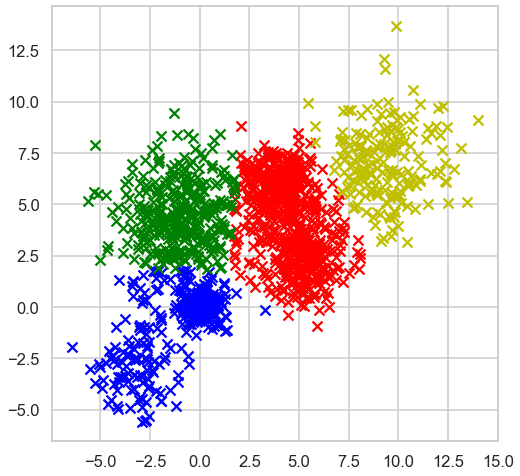

In [80]:
#testing k4
df1 = Multi_blob_Data_df[Multi_blob_Data_df['k4']==0]
df2 = Multi_blob_Data_df[Multi_blob_Data_df['k4']==1]
df3 = Multi_blob_Data_df[Multi_blob_Data_df['k4']==2]
df4 = Multi_blob_Data_df[Multi_blob_Data_df['k4']==3]
plt.scatter(df1['x'],df1['y'],c = 'b', marker = 'x', s = 100)
plt.scatter(df2['x'],df2['y'],c = 'r', marker = 'x', s = 100)
plt.scatter(df3['x'],df3['y'],c = 'g', marker = 'x', s = 100)
plt.scatter(df4['x'],df4['y'],c = 'y', marker = 'x', s = 100)


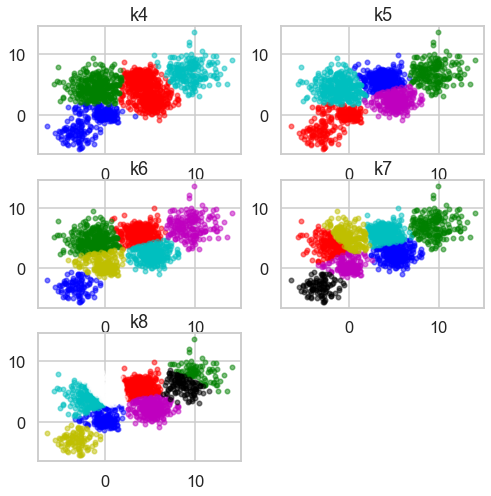

In [81]:
#applying display_cluster for each k value

plt.figure()
plt.subplot(321)
display_cluster(Multi_blob_Data_df,4);
plt.subplot(322)
display_cluster(Multi_blob_Data_df,5);
plt.subplot(323)
display_cluster(Multi_blob_Data_df,6);
plt.subplot(324)
display_cluster(Multi_blob_Data_df,7);
plt.subplot(325)
display_cluster(Multi_blob_Data_df,8);


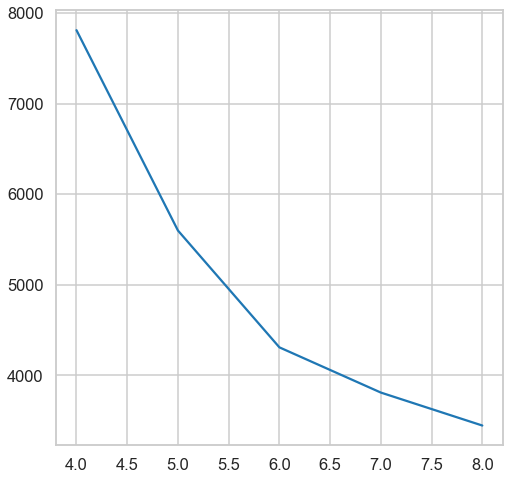

In [82]:
#plot distortion function versus K --> K value at the elbow is better to choose 
k = [4,5,6,7,8]
y=[]
for i in k :
    y.append(KMeans(i).fit(Multi_blob_Data_df1).inertia_)
plt.plot(k,y)
#best k is 6

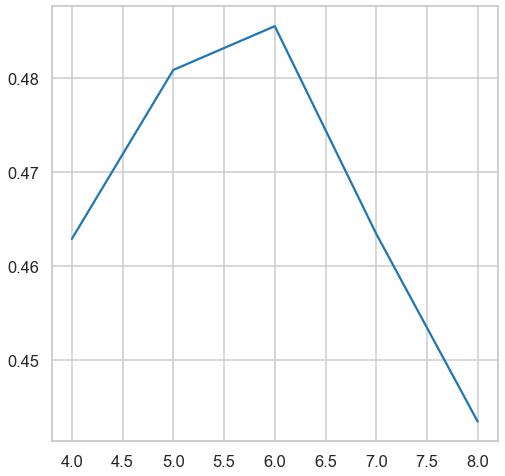

In [83]:
#silhouette_score
z=[]
z.append(silhouette_score(Multi_blob_Data_df1, k4))

z.append(silhouette_score(Multi_blob_Data_df1, k5))

z.append(silhouette_score(Multi_blob_Data_df1, k6))

z.append(silhouette_score(Multi_blob_Data_df1, k7))

z.append(silhouette_score(Multi_blob_Data_df1, k8))


plt.plot(k,z)
#best k is 6

In [84]:
Kmeans_max_silhouette_score=max(z)

### Hierarchal Clustering
* Use AgglomerativeClustering function to  to cluster the above data 
* In the  AgglomerativeClustering change the following parameters 
    * Affinity (use euclidean, manhattan and cosine) --> distance metric
    * Linkage( use average and single ) --> merging multi points clusters
    * Distance_threshold (try different) 
* For each of these trials plot the Dendograph , calculate the silhouette_score and display the resulting clusters  
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observation 

In [85]:
def hierarchal_clustering(df,meth,metr,threshold,aff):
    dendrogram = sch.dendrogram(sch.linkage(df,method=meth, metric=metr))
    plt.axhline(y=threshold, color='r', linestyle='--')
    cluster = AgglomerativeClustering(n_clusters=None , distance_threshold = threshold, affinity=aff , linkage=meth)
    clustering = cluster.fit_predict(df)
    silhouette=silhouette_score(df, clustering)
    return dendrogram , cluster , clustering ,silhouette

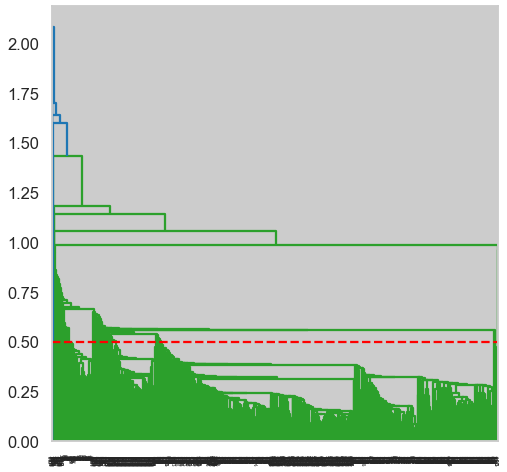

In [86]:
# create dendrogram of single linkage eculidean distance with distance .5 
dendrogram_euclidean_s , cluster_euclidean_s , clustering_euclidean_s , silhouette_euclidean_s =hierarchal_clustering(Multi_blob_Data_df1,'single','euclidean',0.5,'euclidean')

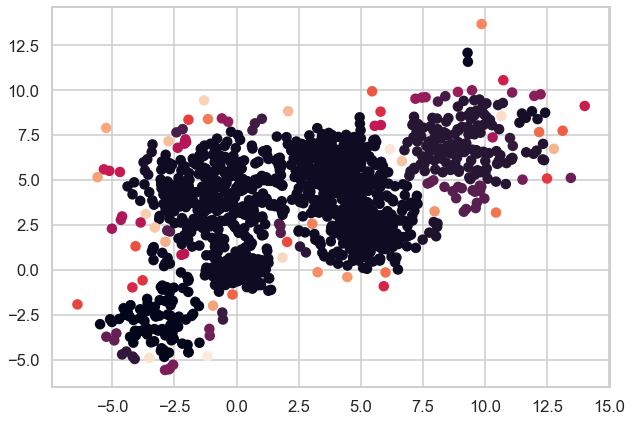

In [87]:
plt.figure(figsize=(10, 7))  
plt.scatter(Multi_blob_Data_df1['x'], Multi_blob_Data_df1['y'], c=cluster_euclidean_s.labels_) 

In [88]:
silhouette_euclidean_s

-0.4596550259264691

In [89]:
len(np.unique(clustering_euclidean_s))
# k = 78

78

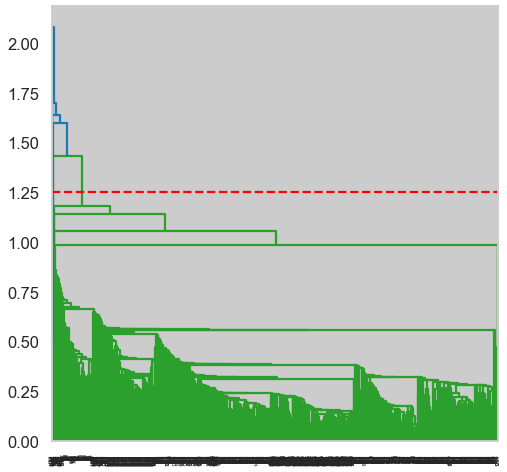

In [90]:
# create dendrogram of eculidean distance with threshold 1.25
dendrogram_euclidean_s , cluster_euclidean_s , clustering_euclidean_s ,silhouette_euclidean_s =hierarchal_clustering(Multi_blob_Data_df1,'single','euclidean',1.25,'euclidean')

In [91]:
print(clustering_euclidean_s ,silhouette_euclidean_s) 
# representing k clusters from 0 to k-1

[0 0 0 ... 2 0 0] 0.08705564851389591


In [92]:
len(np.unique(clustering_euclidean_s))
# k = 6

6

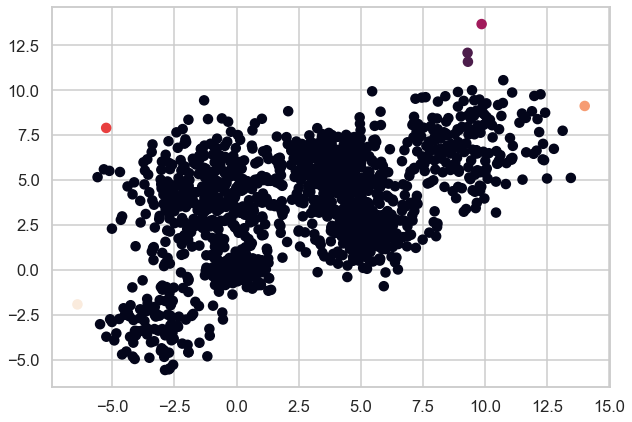

In [93]:
plt.figure(figsize=(10, 7))  
plt.scatter(Multi_blob_Data_df1['x'], Multi_blob_Data_df1['y'], c=cluster_euclidean_s.labels_) 

[3 3 3 ... 4 0 0] 0.41478815574933364


6

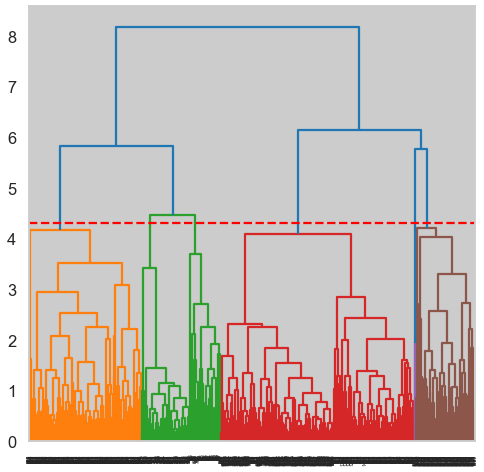

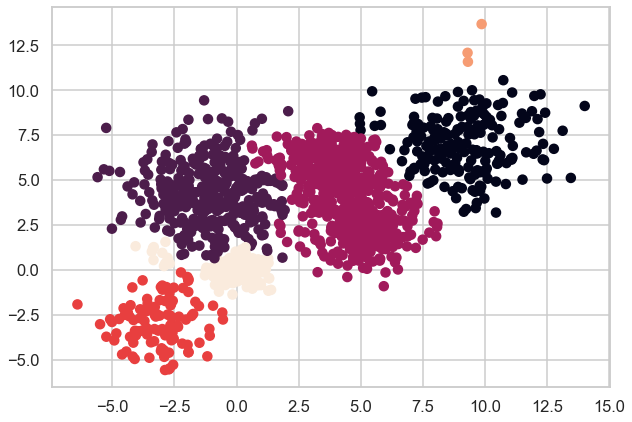

In [94]:
# create dendrogram of anerage linkage eculidean distance with distance 4.3
dendrogram_euclidean_a , cluster_euclidean_a , clustering_euclidean_a ,silhouette_euclidean_a =hierarchal_clustering(Multi_blob_Data_df1,'average','euclidean',4.3,'euclidean')
print(clustering_euclidean_a ,silhouette_euclidean_a) 
plt.figure(figsize=(10, 7))  
plt.scatter(Multi_blob_Data_df1['x'], Multi_blob_Data_df1['y'], c=cluster_euclidean_a.labels_) 
len(np.unique(clustering_euclidean_a))
# k = 6

[0 0 0 ... 4 1 1] 0.433187948807373


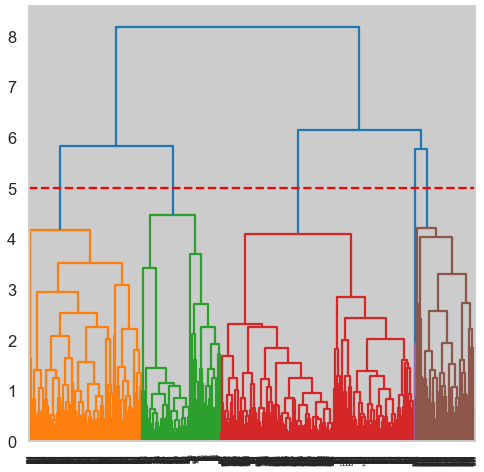

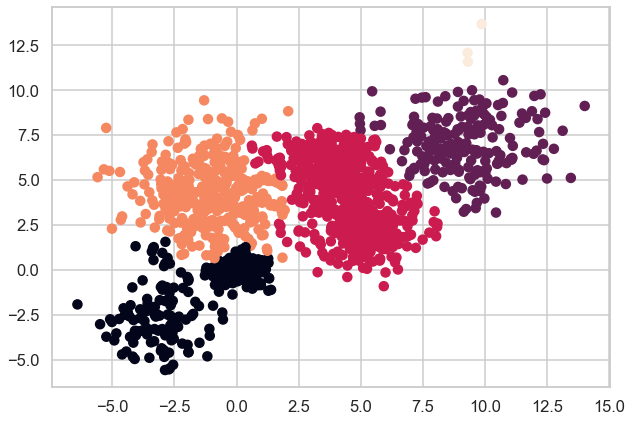

In [95]:
# create dendrogram of average linkage eculidean distance with distance 5
dendrogram_euclidean_a , cluster_euclidean_a , clustering_euclidean_a ,silhouette_euclidean_a =hierarchal_clustering(Multi_blob_Data_df1,'average','euclidean',5,'euclidean')
print(clustering_euclidean_a ,silhouette_euclidean_a) 
plt.figure(figsize=(10, 7))  
plt.scatter(Multi_blob_Data_df1['x'], Multi_blob_Data_df1['y'], c=cluster_euclidean_a.labels_) 

In [96]:
len(np.unique(clustering_euclidean_a))
# k = 5

5

[1 1 1 ... 0 0 0] 0.4490582469502603


4

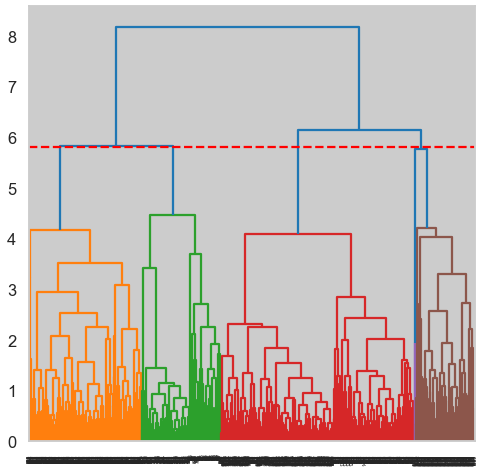

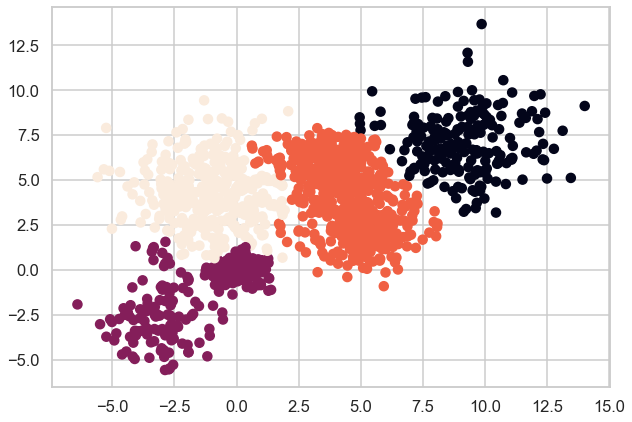

In [97]:
# create dendrogram of average linkage eculidean distance with distance 5.8
dendrogram_euclidean_a , cluster_euclidean_a , clustering_euclidean_a ,silhouette_euclidean_a =hierarchal_clustering(Multi_blob_Data_df1,'average','euclidean',5.8,'euclidean')
print(clustering_euclidean_a ,silhouette_euclidean_a) 
plt.figure(figsize=(10, 7))  
plt.scatter(Multi_blob_Data_df1['x'], Multi_blob_Data_df1['y'], c=cluster_euclidean_a.labels_) 
len(np.unique(clustering_euclidean_a))
# k = 4

[0 0 0 ... 5 0 0] 0.08705564851389591


6

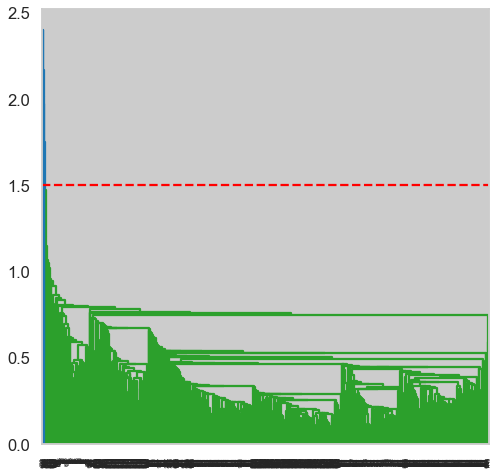

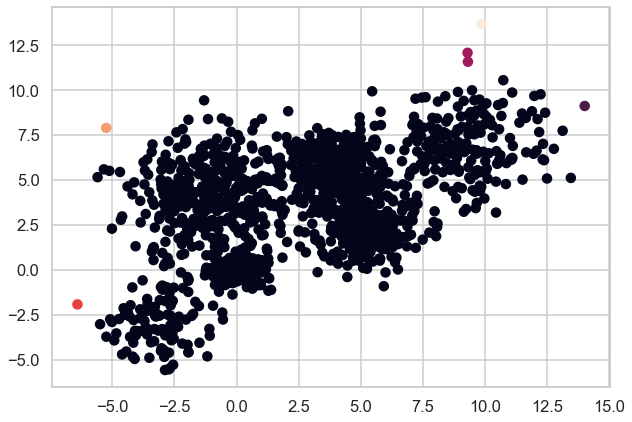

In [98]:
# create dendrogram of single linkage manhattan distance (cityblock) with threshold 1.5
dendrogram_manhattan_s , cluster_manhattan_s , clustering_manhattan_s ,silhouette_manhattan_s =hierarchal_clustering(Multi_blob_Data_df1,'single','cityblock',1.5,'manhattan')
print(clustering_manhattan_s ,silhouette_manhattan_s) 
plt.figure(figsize=(10, 7))  
plt.scatter(Multi_blob_Data_df1['x'], Multi_blob_Data_df1['y'], c=cluster_manhattan_s.labels_) 
len(np.unique(clustering_manhattan_s))
# k = 6

[ 1  1  1 ... 12  4  1] -0.4080040507331309


16

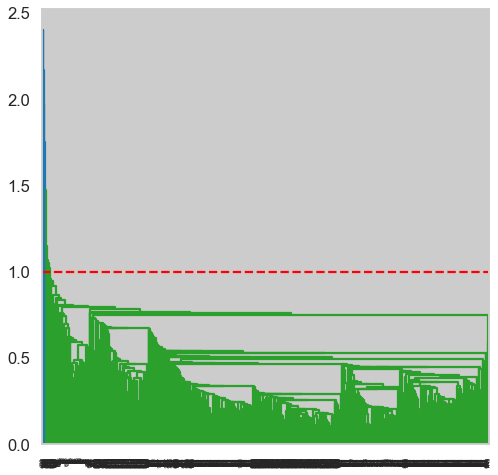

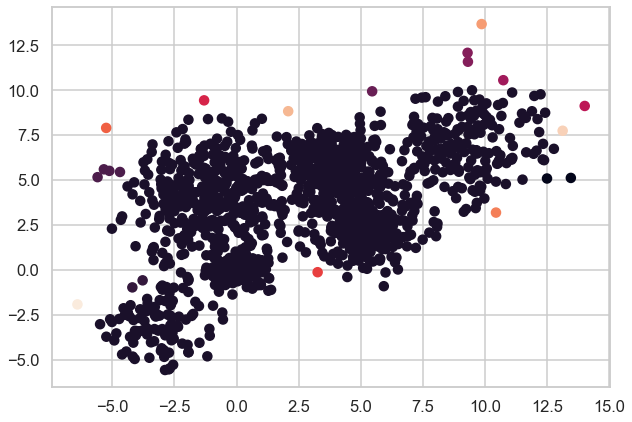

In [99]:
# create dendrogram of single linkage manhattan distance (cityblock) with threshold 1
dendrogram_manhattan_s , cluster_manhattan_s , clustering_manhattan_s ,silhouette_manhattan_s =hierarchal_clustering(Multi_blob_Data_df1,'single','cityblock',1,'manhattan')
print(clustering_manhattan_s ,silhouette_manhattan_s) 
plt.figure(figsize=(10, 7))  
plt.scatter(Multi_blob_Data_df1['x'], Multi_blob_Data_df1['y'], c=cluster_manhattan_s.labels_) 
len(np.unique(clustering_manhattan_s))
# k = 6

[1 1 1 ... 2 4 8] 0.399558543983381


9

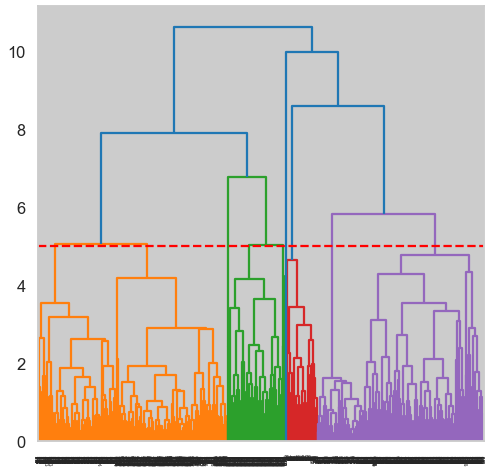

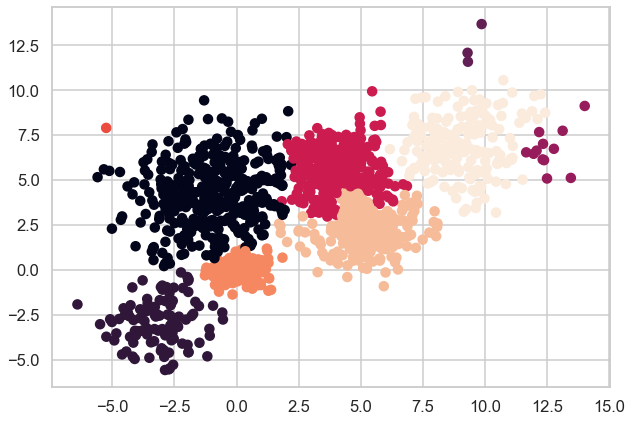

In [100]:
# create dendrogram of average linkage manhattan distance (cityblock) with threshold 5
dendrogram_manhattan_a , cluster_manhattan_a , clustering_manhattan_a ,silhouette_manhattan_a =hierarchal_clustering(Multi_blob_Data_df1,'average','cityblock',5,'manhattan')
print(clustering_manhattan_a ,silhouette_manhattan_a) 
plt.figure(figsize=(10, 7))  
plt.scatter(Multi_blob_Data_df1['x'], Multi_blob_Data_df1['y'], c=cluster_manhattan_a.labels_) 
len(np.unique(clustering_manhattan_a))
# k = 9

[3 3 3 ... 0 4 0] 0.39540970031359807


5

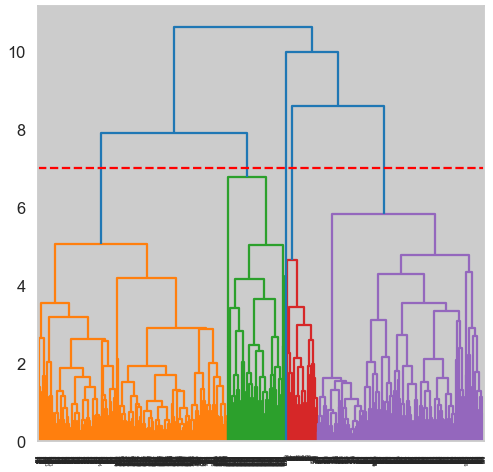

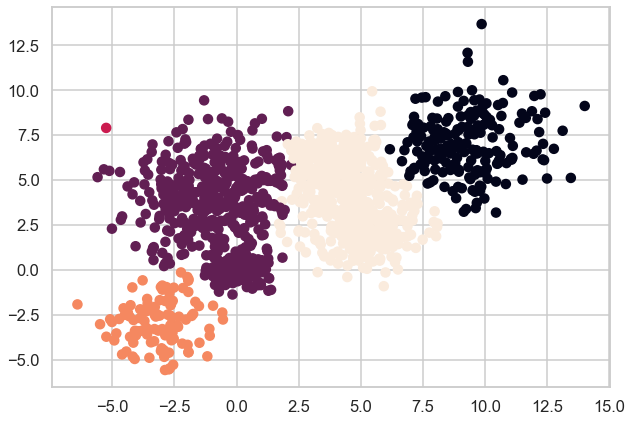

In [101]:
# create dendrogram of average linkage manhattan distance (cityblock) with threshold 7
dendrogram_manhattan_a , cluster_manhattan_a , clustering_manhattan_a ,silhouette_manhattan_a =hierarchal_clustering(Multi_blob_Data_df1,'average','cityblock',7,'manhattan')
print(clustering_manhattan_a ,silhouette_manhattan_a) 
plt.figure(figsize=(10, 7))  
plt.scatter(Multi_blob_Data_df1['x'], Multi_blob_Data_df1['y'], c=cluster_manhattan_a.labels_) 
len(np.unique(clustering_manhattan_a))
# k = 6

[1 1 1 ... 4 4 4] 0.07699405164704985


5

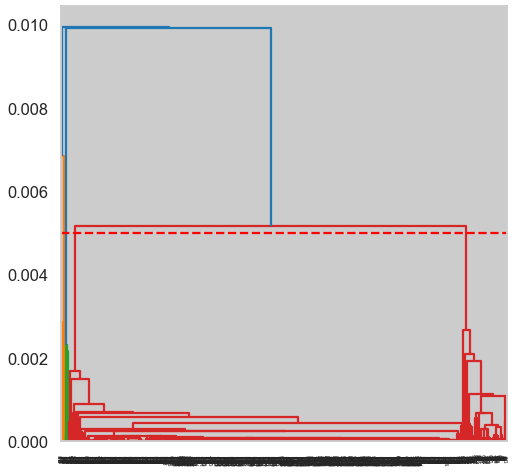

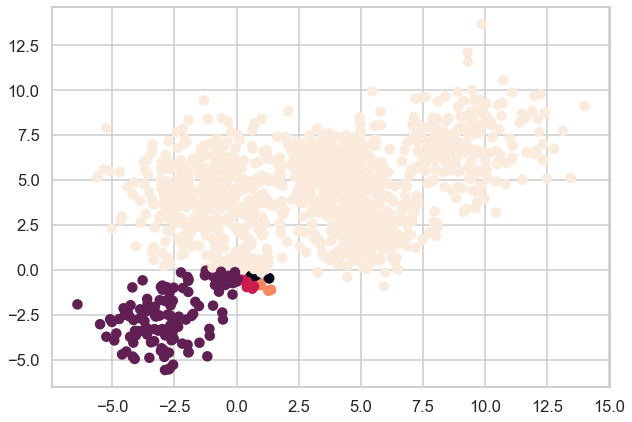

In [102]:
# create dendrogram of single linkage cosine distance with threshold 0.005
dendrogram_cosine_s , cluster_cosine_s , clustering_cosine_s ,silhouette_cosine_s =hierarchal_clustering(Multi_blob_Data_df1,'single','cosine',0.005,'cosine')
print(clustering_cosine_s ,silhouette_cosine_s) 
plt.figure(figsize=(10, 7))  
plt.scatter(Multi_blob_Data_df1['x'], Multi_blob_Data_df1['y'], c=cluster_cosine_s.labels_) 
len(np.unique(clustering_cosine_s))
# k = 5

[0 0 0 ... 1 1 1] 0.040594337326923476


10

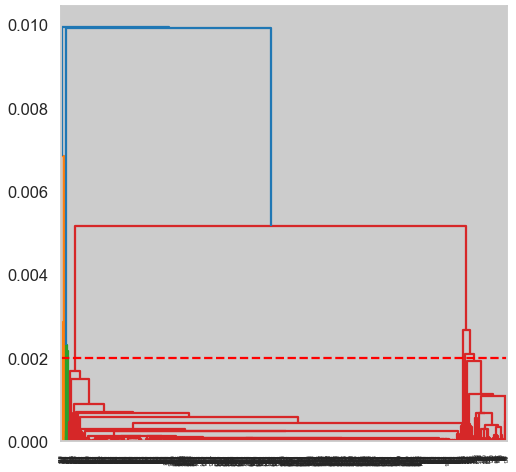

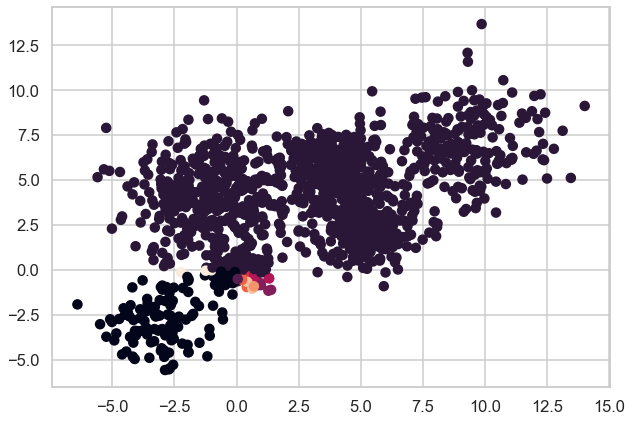

In [103]:
# create dendrogram of single linkage cosine distance with threshold 0.002
dendrogram_cosine_s , cluster_cosine_s , clustering_cosine_s ,silhouette_cosine_s =hierarchal_clustering(Multi_blob_Data_df1,'single','cosine',0.002,'cosine')
print(clustering_cosine_s ,silhouette_cosine_s) 
plt.figure(figsize=(10, 7))  
plt.scatter(Multi_blob_Data_df1['x'], Multi_blob_Data_df1['y'], c=cluster_cosine_s.labels_) 
len(np.unique(clustering_cosine_s))
# k = 10

[2 2 2 ... 3 3 3] 0.28022113778340446


4

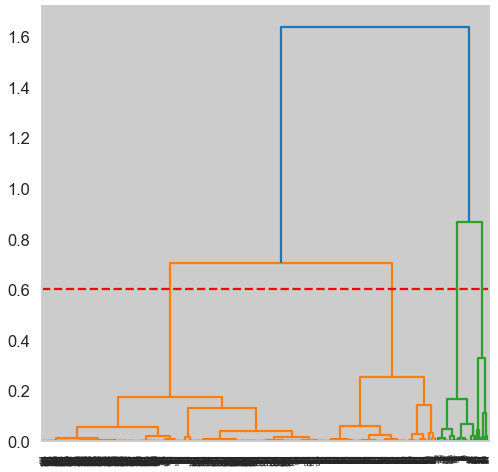

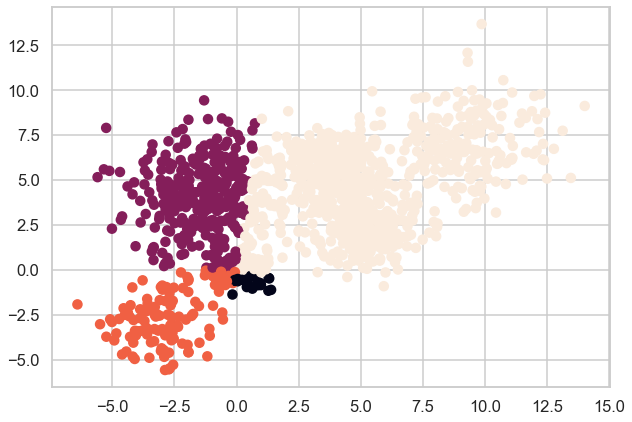

In [104]:
# create dendrogram of average linkage cosine distance with threshold 0.6
dendrogram_cosine_a , cluster_cosine_a , clustering_cosine_a ,silhouette_cosine_a =hierarchal_clustering(Multi_blob_Data_df1,'average','cosine',0.6,'cosine')
print(clustering_cosine_a ,silhouette_cosine_a) 
plt.figure(figsize=(10, 7))  
plt.scatter(Multi_blob_Data_df1['x'], Multi_blob_Data_df1['y'], c=cluster_cosine_a.labels_) 
len(np.unique(clustering_cosine_a))
# k = 6

[2 2 2 ... 0 0 0] 0.2035575393889621


6

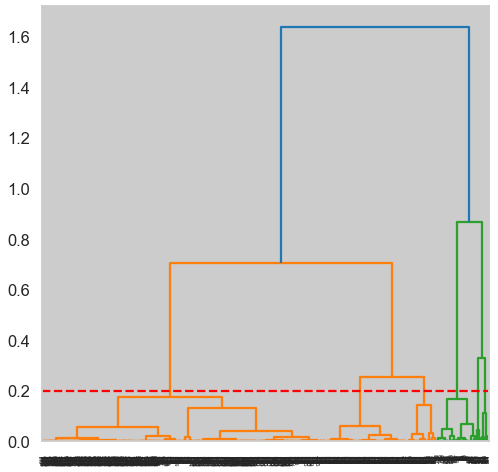

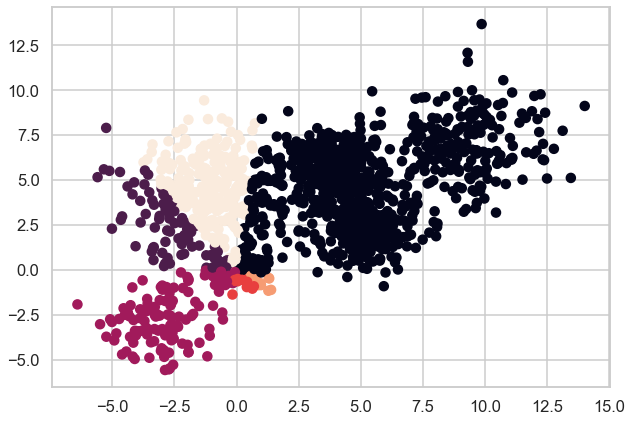

In [105]:
# create dendrogram of average linkage cosine distance with threshold 0.2
dendrogram_cosine_a , cluster_cosine_a , clustering_cosine_a ,silhouette_cosine_a =hierarchal_clustering(Multi_blob_Data_df1,'average','cosine',0.2,'cosine')
print(clustering_cosine_a ,silhouette_cosine_a) 
plt.figure(figsize=(10, 7))  
plt.scatter(Multi_blob_Data_df1['x'], Multi_blob_Data_df1['y'], c=cluster_cosine_a.labels_) 
len(np.unique(clustering_cosine_a))
# k = 6

### better clustering is the average linkage eculidean distance with threshold 5.8 ; the silhouette score is 0.499


In [106]:
Hierarical_max_silhouette_score=silhouette_euclidean_a

### DBScan
* Use DBScan function to  to cluster the above data 
* In the  DBscan change the following parameters 
    * EPS (from 0.1 to 3)
    * Min_samples (from 5 to 25)
* Plot the silhouette_score versus the variation in the EPS and the min_samples
* Plot the resulting Clusters in this case 
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observations and comments 

In [107]:
# general function 
def db(df,epsilon, minpoints):
    dbscan = DBSCAN(eps=epsilon,min_samples=minpoints)
    clusters=dbscan.fit_predict(df)
    silhouette=silhouette_score(df, dbscan.labels_)
    return  len(np.unique(clusters)) , dbscan , silhouette 

In [108]:
def plotdbscatter(df,db,eps,minpoints,number):
    plt.subplot(number)
    plt.scatter(df['x'], df['y'], c=db.labels_ , s=10) 
    plt.title("eps =" + str(eps) + ", minpoints = " + str(minpoints))

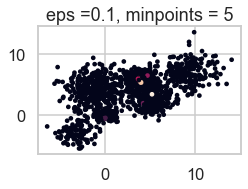

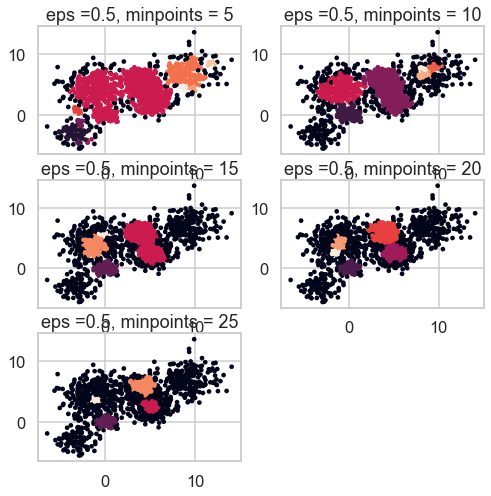

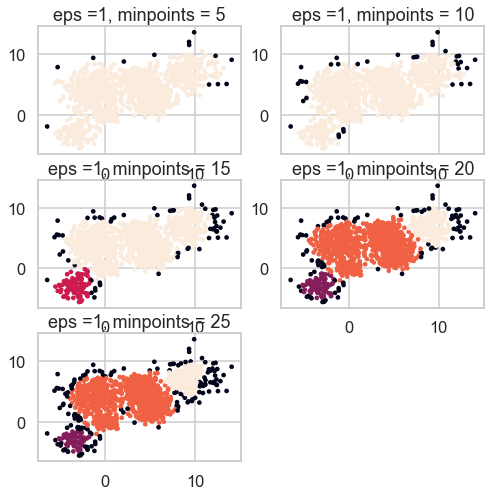

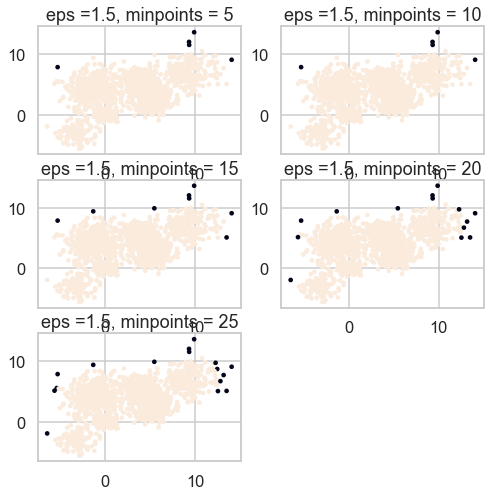

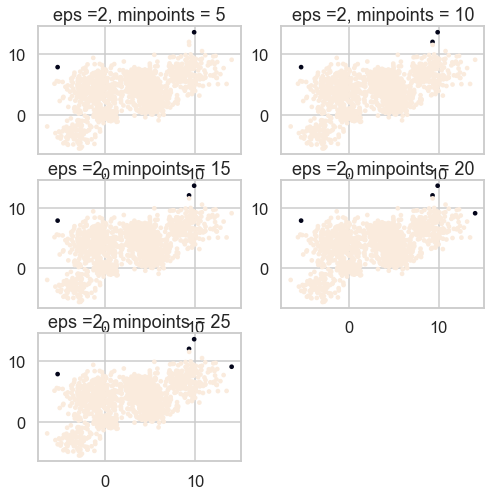

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

In [109]:
eps= [0.1,0.5,1,1.5,2,2.5,3]
minpoints = [5,10,15,20,25]
silhouette_scores =[]
cases=[]
for i in eps :
    l=1
    plt.figure()
    for j in minpoints :
        try :
            num_of_clusters , db_clustering , silhouette  = db(Multi_blob_Data_df1,i, j)
            silhouette_scores.append(silhouette)
            cases.append("eps =" + str(i) + ", minpoints = " + str(j))
            plotdbscatter(Multi_blob_Data_df1,db_clustering,i,j,320+l)
            l=l+1
        except : 
            break

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

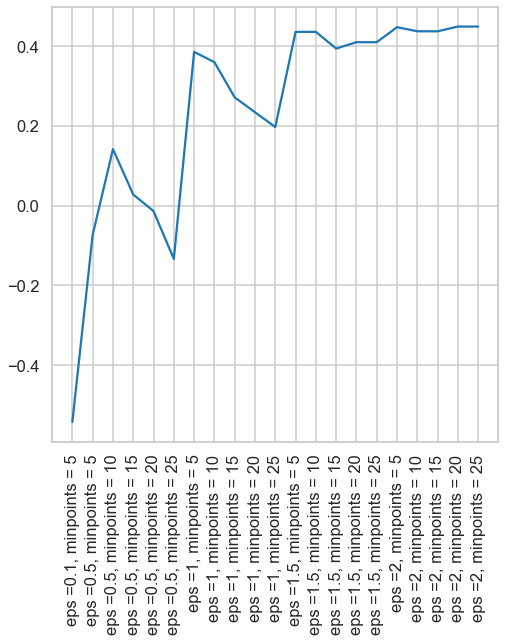

In [110]:
plt.plot(cases,silhouette_scores)
plt.xticks(rotation=90)

14

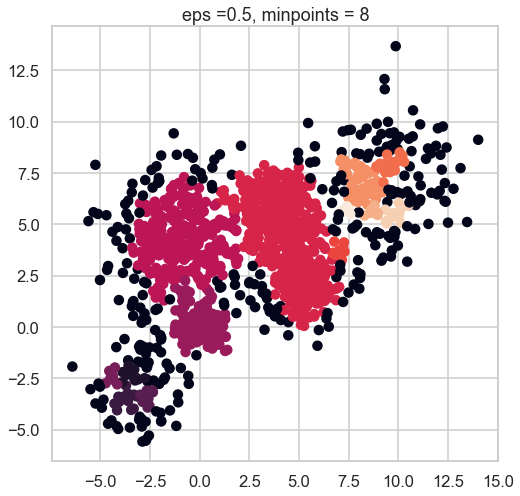

In [111]:
# eps = 0.5 is a good starting tuning for eps parameter as when less there is a lot of noise 
# in this case for minpoints , it seems between 5 and 10 lets try 8 
num_of_clusters , db_clustering , silhouette  = db(Multi_blob_Data_df1,0.5, 8)
plt.scatter(Multi_blob_Data_df1['x'], Multi_blob_Data_df1['y'], c=db_clustering.labels_ ) 
plt.title("eps =" + str(0.5) + ", minpoints = " + str(8))
num_of_clusters
# too much clusters

4

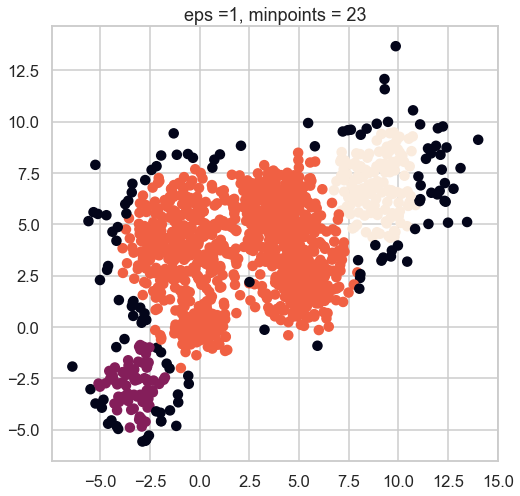

In [112]:
# eps = 1 is a good maximum tuning for eps parameter as when more less there is a lot of noise and when larger details are gone .
# for minpoints , it seems between 20 and 25 lets try 23
num_of_clusters , db_clustering , silhouette  = db(Multi_blob_Data_df1,1, 23)
plt.scatter(Multi_blob_Data_df1['x'], Multi_blob_Data_df1['y'], c=db_clustering.labels_ ) 
plt.title("eps =" + str(1) + ", minpoints = " + str(23))
num_of_clusters

5

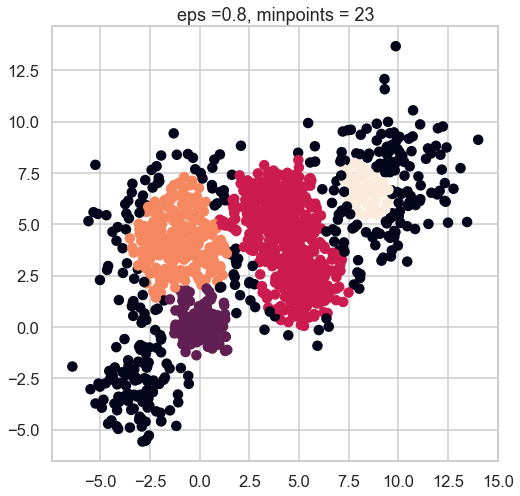

In [113]:
# we need to show more details so let's make the eps = 0.8 
num_of_clusters , db_clustering , silhouette  = db(Multi_blob_Data_df1,0.8, 23)
plt.scatter(Multi_blob_Data_df1['x'], Multi_blob_Data_df1['y'], c=db_clustering.labels_ ) 
plt.title("eps =" + str(.8) + ", minpoints = " + str(23))
num_of_clusters

In [114]:
DBscan_max_silhouette_score = silhouette

### Gaussian Mixture
* Use GaussianMixture function to cluster the above data 
* In GMM change the covariance_type and check the difference in the resulting probability fit 
* Use a 2D contour plot to plot the resulting distribution (the components of the GMM) as well as the total Gaussian mixture 

In [115]:
# as it's some how like kmeans clustering so we can assume n_componants is 6 (best for kmeans)
# as our data is on the same scale no need for z transformation 

In [116]:
GMM = GaussianMixture(n_components= 6 ) # default='full'
GMM.fit(Multi_blob_Data_df1)
hard_clusters=GMM.predict(Multi_blob_Data_df1)
soft_clusters=GMM.predict_proba(Multi_blob_Data_df1)
silhouette=silhouette_score(Multi_blob_Data_df1, hard_clusters)

In [117]:
hard_clusters

array([5, 5, 5, ..., 2, 2, 2], dtype=int64)

In [118]:
soft_clusters

array([[3.50927296e-04, 4.36314944e-17, 1.55338534e-20, 5.18707144e-33,
        2.23543673e-21, 9.99649073e-01],
       [1.78196868e-02, 2.16925767e-13, 1.96790111e-16, 6.38112326e-23,
        4.51495507e-17, 9.82180313e-01],
       [1.77228185e-04, 2.00815841e-20, 3.97249850e-22, 7.32262816e-37,
        1.80277639e-23, 9.99822772e-01],
       ...,
       [1.83823879e-12, 2.38626858e-22, 9.99983411e-01, 5.41345591e-22,
        1.64508588e-05, 1.38145920e-07],
       [3.37575828e-04, 8.37284359e-08, 9.86767868e-01, 3.45774975e-03,
        9.36193722e-03, 7.47854417e-05],
       [6.43555113e-09, 1.16572687e-06, 6.49230015e-01, 9.01893228e-06,
        3.50734802e-01, 2.49921609e-05]])

In [119]:
silhouette

0.44546297473197183

In [120]:
GMM = GaussianMixture(n_components= 6 , covariance_type='spherical' )
GMM.fit(Multi_blob_Data_df1)
hard_clusters=GMM.predict(Multi_blob_Data_df1)
soft_clusters=GMM.predict_proba(Multi_blob_Data_df1)
silhouette=silhouette_score(Multi_blob_Data_df1, hard_clusters)
silhouette

0.4543675760140813

In [121]:
hard_clusters

array([3, 3, 3, ..., 1, 1, 1], dtype=int64)

In [122]:
soft_clusters

array([[1.88552576e-009, 1.32165050e-017, 2.47662985e-004,
        9.99752335e-001, 5.97126799e-034, 2.13161341e-015],
       [7.32877430e-003, 6.82363832e-014, 8.33605854e-002,
        9.09310640e-001, 4.22651146e-023, 6.36769766e-011],
       [2.66253418e-013, 1.63894371e-019, 8.33817356e-005,
        9.99916618e-001, 3.12832997e-038, 2.32596821e-018],
       ...,
       [8.16610208e-167, 1.00000000e+000, 8.00723616e-012,
        1.80868379e-064, 9.09908733e-023, 8.65502658e-023],
       [4.27870497e-075, 9.97089804e-001, 4.63890183e-004,
        3.35766042e-035, 2.44628536e-003, 2.08721963e-008],
       [1.35924507e-076, 9.99995669e-001, 1.79105397e-007,
        1.65516064e-037, 2.79428433e-006, 1.35760730e-006]])

In [123]:
GMM = GaussianMixture(n_components= 6 , covariance_type='diag' )
GMM.fit(Multi_blob_Data_df1)
hard_clusters=GMM.predict(Multi_blob_Data_df1)
soft_clusters=GMM.predict_proba(Multi_blob_Data_df1)
silhouette=silhouette_score(Multi_blob_Data_df1, hard_clusters)
silhouette
weights = GMM.weights_
means = GMM.means_
covariances = GMM.covariances_

In [124]:
soft_clusters

array([[4.79611554e-018, 1.51785803e-015, 4.46107314e-010,
        9.99378059e-001, 4.46118100e-034, 6.21940380e-004],
       [1.40609190e-014, 2.03702319e-011, 7.60265301e-003,
        8.83724040e-001, 5.11429493e-023, 1.08673307e-001],
       [4.12178542e-020, 1.14154357e-018, 8.11866716e-014,
        9.99806998e-001, 3.59037008e-038, 1.93001927e-004],
       ...,
       [1.00000000e+000, 3.31843433e-021, 1.74250988e-180,
        2.06328993e-062, 5.66945139e-023, 1.11892892e-012],
       [9.97469125e-001, 2.12598709e-007, 5.45914413e-083,
        4.60037631e-033, 2.21795372e-003, 3.12709088e-004],
       [9.99991803e-001, 2.71649610e-006, 4.64279013e-079,
        2.36463582e-038, 5.45603806e-006, 2.42664493e-008]])

In [125]:
# as higher silhouettte score is when covariance type is diag so we will use it to plot
#def plot_distribution(means,covariances,weights):


In [126]:
#plot_distribution(means,covariances,weights)

0.21743719146142043
0.27957405907333943
0.09992662817163585
0.13809673536541925
0.06990738984833321
0.1950579960798527


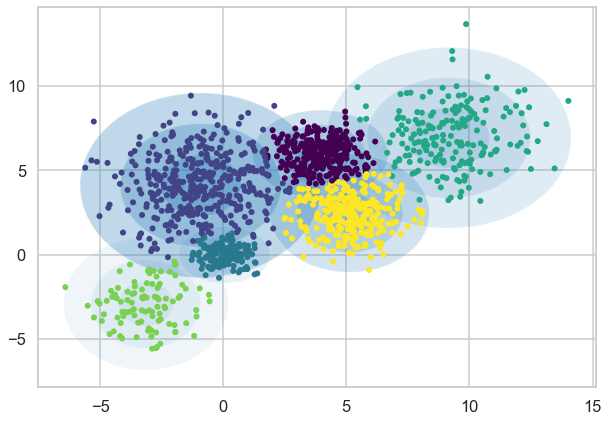

In [127]:
def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height, 
                             angle, **kwargs))
        
        
def plot_gmm(gmm, X , ax=None):
    labels = gmm.fit(X).predict(X)
    #plot data points due to different clusters
    plt.scatter(X[:, 0], X[:, 1], c=labels, s=20, cmap='viridis', zorder=2)
    for mean, covariance, weight in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        print(weight)
        draw_ellipse(mean, covariance, alpha=weight)       

plt.figure(figsize=(10, 7))
plot_gmm(GMM, Multi_blob_Data)

## iris data set 
The iris data set is test data set that is part of the Sklearn module 
which contains 150 records each with 4 features. All the features are represented by real numbers 

The data represents three classes 


In [128]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_data.target[[10, 25, 50]]
#array([0, 0, 1])
list(iris_data.target_names)

['setosa', 'versicolor', 'virginica']

In [129]:
type(iris_data)

sklearn.utils.Bunch

* Repeat all the above clustering approaches and steps on the above data 
* Normalize the data then repeat all the above steps 
* Compare between the different clustering approaches 

## Customer dataset
Repeat all the above on the customer data set 